# Data Modeling

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import raw data
raw_data = pd.read_csv('../data/heart.csv')
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Preparing raw_data to features and labels

In [3]:
raw_features = raw_data.columns[:-1]
raw_features

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [4]:
raw_labels = raw_data.columns[-1]
raw_labels

'HeartDisease'

### One-hot encode categorical variables

We identify categorical features ('Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope') and perform one hot encoding. For each of these features we add n additional features to the dataset where n is the number of categories of this feature. Each of these columns would have only 1's or 0's.

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

In [6]:
from sklearn.preprocessing import OneHotEncoder
# create an encoder and fit the dataframe
categorical_columns= ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope' ]
categorical_data = raw_data[categorical_columns]
enc = OneHotEncoder(sparse=False).fit(categorical_data)
encoded = enc.transform(categorical_data)
# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.head()

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [7]:
modified_df = pd.concat([raw_data[raw_data.columns.difference(categorical_columns)], encoded_df], axis = 1)

modified_df
            

,Age,Cholesterol,FastingBS,HeartDisease,MaxHR,Oldpeak,RestingBP,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,0,172,0.0,140,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,180,0,1,156,1.0,160,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,283,0,0,98,0.0,130,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,214,0,1,108,1.5,138,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,195,0,0,122,0.0,150,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,264,0,1,132,1.2,110,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,193,1,1,141,3.4,144,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,131,0,1,115,1.2,130,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,236,0,1,174,0.0,130,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0



## Min-max normalize features

To standardize the columns, which might have different units and scales of measurement, we use the min-max normalizer. It is a technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.

In [8]:
import pandas as pd
from sklearn import preprocessing

x = modified_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = modified_df.columns)

In [9]:
df

,Age,Cholesterol,FastingBS,HeartDisease,MaxHR,Oldpeak,RestingBP,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.479270,0.0,0.0,0.788732,0.295455,0.70,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.298507,0.0,1.0,0.676056,0.409091,0.80,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.469320,0.0,0.0,0.267606,0.295455,0.65,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.354892,0.0,1.0,0.338028,0.465909,0.69,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.323383,0.0,0.0,0.436620,0.295455,0.75,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.437811,0.0,1.0,0.507042,0.431818,0.55,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.320066,1.0,1.0,0.570423,0.681818,0.72,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.217247,0.0,1.0,0.387324,0.431818,0.65,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.391376,0.0,1.0,0.802817,0.295455,0.65,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
features = ['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'RestingBP', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

In [11]:
X,y = df[features], df['HeartDisease']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In the sections below, we fit logistic regression, MLP, and random forest models in this prediction task.

## Logistic regression model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [14]:
logisticRegr = LogisticRegression()

In [15]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [16]:
predictions = logisticRegr.predict(x_test)

In [63]:
print("logistic training score :",logisticRegr.score(x_train,y_train))
print("logistic testing score :",logisticRegr.score(x_test,y_test))

logistic training score : 0.8822674418604651
logistic testing score : 0.8217391304347826


In [22]:
print('recall', recall_score(predictions, y_test))
print('precision', precision_score(predictions, y_test))

recall 0.825503355704698
precision 0.8913043478260869


In [24]:
cm = metrics.confusion_matrix(y_test, predictions)

[[ 66  26]
 [ 15 123]]


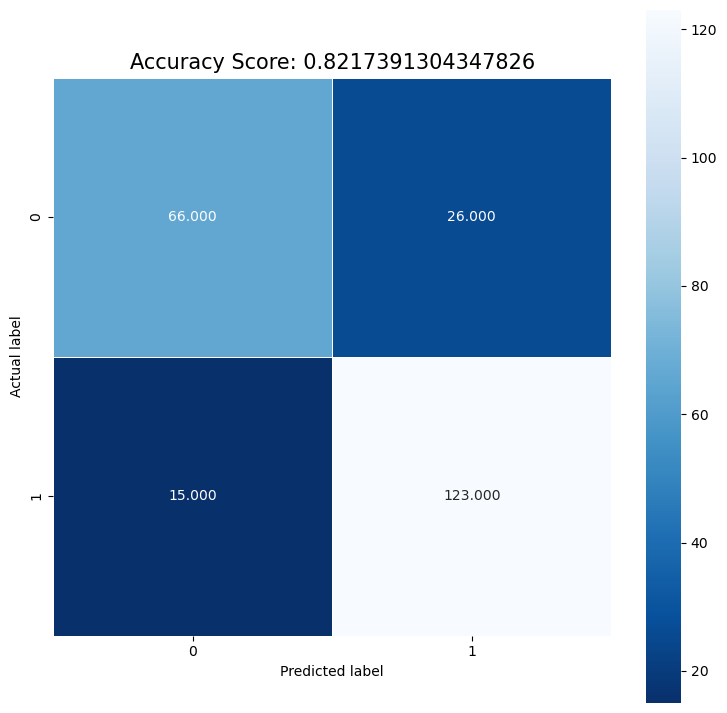

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

We see that there are more FP than FN, and that although they are pretty close, recall is less than the precision. In our case of predicting heart disease, we probably want to prioritize recall, since we want to detect as many positive cases of heart disease as possible. 

## MLP classifier

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

print("MLP training score :",clf.score(x_train,y_train))
print("MLP testing score :",clf.score(x_test,y_test))
predictions = clf.predict(x_test)
print('recall', recall_score(predictions, y_test))
print('precision', precision_score(predictions, y_test))


MLP training score : 0.9113372093023255
MLP testing score : 0.8478260869565217
recall 0.8551724137931035
precision 0.8985507246376812


/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Random forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(x_train,y_train)

print("RF training score :",RF.score(x_train,y_train))
print("RF testing score :",RF.score(x_test,y_test))

predictions = RF.predict(x_test)
print('recall', recall_score(predictions, y_test))
print('precision', precision_score(predictions, y_test))

RF training score : 1.0
RF testing score : 0.8478260869565217
recall 0.8503401360544217
precision 0.9057971014492754


## Putting everything together

We define functions to fit the models, choose the best model based on accuracy, and output the confusion matrix and roc curve.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

def fit_models(x_train, y_train, x_test, y_test):
    
    '''
    this function fits logistic regression, MLP, and random forest 
    and returns the 3 models. 
    
    inputs:
        - x_train, y_train, x_test, y_test 
        
    outputs:
        - logistic regression model, MLP model, and RF model
    
    '''
    
    logisticRegr = LogisticRegression()
    logisticRegr.fit(x_train, y_train)
    
    clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    
    return logisticRegr, clf, RF
    
    

In [29]:
def choose_best_model(logisticRegr, clf, RF):
    '''
    this function chooses the model with the highest accuracy and returns it
    
    inputs:
        - 3 models: logisticRegr, clf, RF
    outputs:
        - model with best accuracy
    
    '''
    models = [logisticRegr, clf, RF]
    log_test_accuracy = logisticRegr.score(x_test, y_test)
    clf_test_accuracy = clf.score(x_test, y_test)
    rf_test_accuracy = RF.score(x_test, y_test)
    
    accuracies = [log_test_accuracy, clf_test_accuracy, rf_test_accuracy]
    best_accuracy = np.max(accuracies)
    best_model = models[np.argmax(accuracies)]

    best_test_predictions = best_model.predict(x_test)
   
    
    model_names = ['logistic regression', 'mlp', 'random forest']
    best_model_name = model_names[np.argmax(accuracies)]
    
    
	
    return best_model, best_test_predictions, best_model_name
    


In [30]:
logisticRegr, clf, RF = fit_models(x_train, y_train, x_test, y_test)

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
best_model, best_test_predictions, best_model_name = choose_best_model(logisticRegr, clf, RF)

In [59]:

def graph_confusion_roc(best_model, x_test, y_test, best_test_predictions, best_model_name, root_dir ):
    '''
    this function
    creates graphs of roc curve and confusion matrix for the best model
    
    inputs:
        - best_model = given by choose_best_model
		- best_test_predictions = list of test predictions given by best model
		- best_model_name = str of name of best model
		- x_test
		- y_test
		- root_dir = str of root directory 
    outputs:
        - graph of roc curve, saved to root_dir/figures
        - graph of confusion matrix, saved to root_dir/figures

    '''


    print('Best Model is: {0}'.format(best_model_name))
    cm = metrics.confusion_matrix(y_test, best_test_predictions)
    

    
    print('Recall is: {0}'.format(recall_score(best_test_predictions, y_test)))
    print('Precision is: {0}'.format(precision_score(best_test_predictions, y_test)))
    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    score = best_model.score(x_test,y_test)
    all_sample_title = 'Accuracy Score of Best Model: {0}'.format(score)
    plt.title(all_sample_title, size = 15)
    plt.savefig(root_dir + '/figures/'+ best_model_name + '_confusion_matrix')
    plt.show()

    
    fpr, tpr, thresholds = metrics.roc_curve(list(y_test), best_test_predictions)
    
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))

    print( "Best model AUC is: {0}".format(metrics.auc(fpr, tpr)))
    plt.plot(fpr, tpr)
    plt.title("ROC curve")
    plt.xlabel("TPR")
    plt.ylabel("FPR")
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.savefig(root_dir + '/figures/'+ best_model_name + '_ROC_curve')
    plt.show()
    
#     predicted_proba = best_model.predict_proba(x_test)
#     optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), key=lambda i: i[0], reverse=True)[0][1]
#     roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_proba[:, -1]]
    
#     print("Accuracy Score Before and After Thresholding: {}, {}".format(metrics.accuracy_score(y_test, best_test_predictions), metrics.accuracy_score(y_test, roc_predictions)))
#     print("Precision Score Before and After Thresholding: {}, {}".format(metrics.precision_score(y_test, best_test_predictions), metrics.precision_score(y_test, roc_predictions)))
#     print("Recall Score Before and After Thresholding: {}, {}".format(metrics.recall_score(y_test, best_test_predictions), metrics.recall_score(y_test, roc_predictions)))
#     print("F1 Score Before and After Thresholding: {}, {}".format(metrics.f1_score(y_test, best_test_predictions), metrics.f1_score(y_test, roc_predictions)))

    

Best Model is: random forest
Recall is: 0.8620689655172413
Precision is: 0.9057971014492754


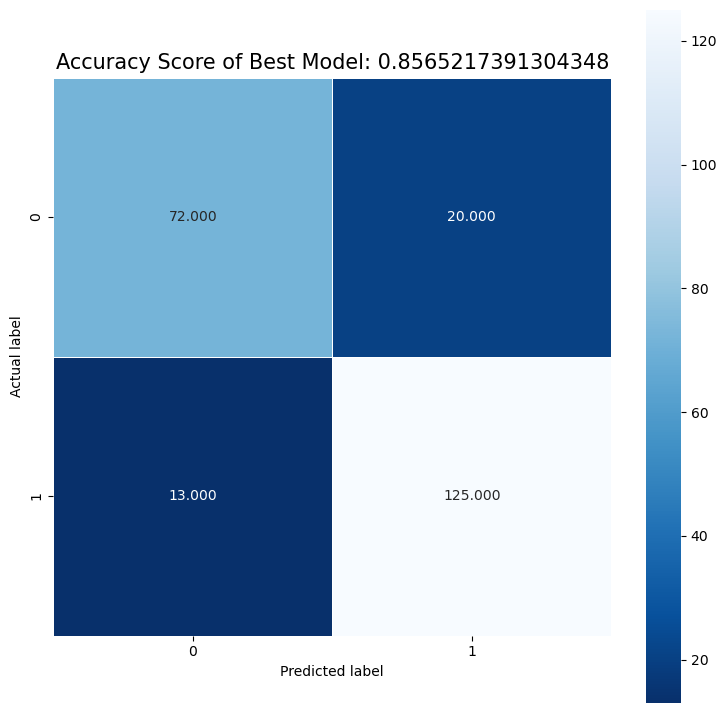

Best Threshold=1.000000
Best model AUC is: 0.8442028985507246


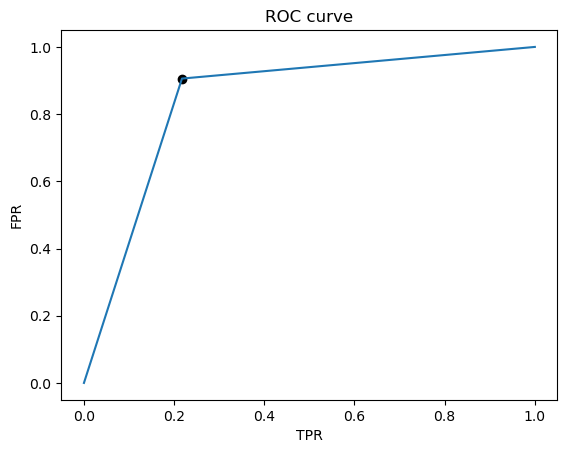

In [60]:
graph_confusion_roc(best_model, x_test, y_test, best_test_predictions, best_model_name, root_dir = '..')

We see that there are more FP than FN, and that although they are pretty close, recall is less than the precision. In our case of predicting heart disease, we probably want to prioritize recall, since we want to detect as many positive cases of heart disease as possible. Thus we would want to set the threshold to be lower than 0.5 to maximize the recall. Additionally, we could also try to inspect the data that are FN to try to identify a pattern, and then we could augment the training set with these FN's so that the model will learn to better identify positive cases.